In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.driver.extraClassPath", "C:/Program Files (x86)/PostgreSQL/pgJDBC/postgresql-42.5.1.jar") \
    .getOrCreate()

In [3]:
clients = spark.read.format("csv").option("header","true").load("data/clients.csv")
orders = spark.read.format("csv").option("header","true").load("data/orders1.csv")

In [5]:
joineddf = orders.join(clients,"client_id","outer")

In [11]:
clientsAndSumAmount = joineddf.groupBy("client_name").agg(
    F.round(F.sum("total_amount"),2).alias("SumAmount")
)

In [15]:
clientsAndSumAmount.orderBy(F.col("SumAmount").desc()).first()

Row(client_name='Mark Taylor', SumAmount=796.45)

In [19]:
clientsAndSumAmount.agg(
    F.round(F.avg("SumAmount"),2).alias("AvgAmount")
).show()

+---------+
|AvgAmount|
+---------+
|   584.35|
+---------+



In [21]:
clientsAndSumAmount.filter(F.col("SumAmount") > 584).orderBy(F.col("SumAmount").desc()).show()

+-----------+---------+
|client_name|SumAmount|
+-----------+---------+
|Mark Taylor|   796.45|
| Lisa Davis|   691.75|
|Bob Johnson|    618.0|
|   John Doe|   617.45|
+-----------+---------+



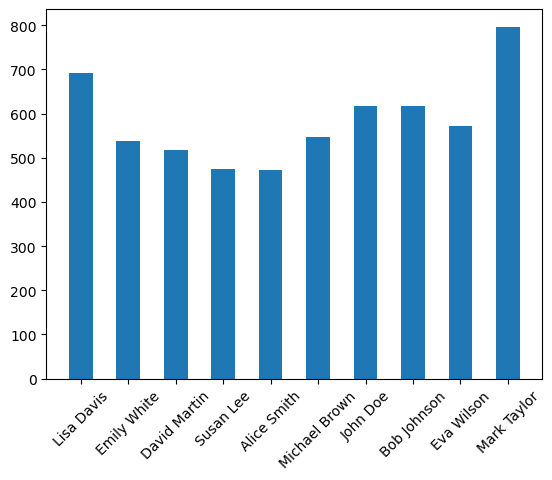

In [27]:
dfpd = clientsAndSumAmount.toPandas()
plt.bar(dfpd["client_name"], dfpd["SumAmount"],width = 0.5)
plt.xticks(rotation=45, fontsize=10)
plt.show()